In [109]:
#Follow this link for explaination - https://github.com/harrywang/document_clustering/blob/master/doc_clustering.ipynb
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [6]:
#Follow this link for explaination - https://github.com/harrywang/document_clustering/blob/master/doc_clustering.ipynb
titles = open('document_cluster-master/title_list.txt').read().split('\n')

In [7]:
len(titles)

101

In [8]:
titles[:10]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca',
 "One Flew Over the Cuckoo's Nest",
 'Gone with the Wind',
 'Citizen Kane',
 'The Wizard of Oz',
 'Titanic']

In [25]:
titles = titles[:100]

In [26]:
genres = open('document_cluster-master/genres_list.txt').read().split('\n')
genres = genres[:100]

In [27]:
genres[0:10]

["[u' Crime', u' Drama']",
 "[u' Crime', u' Drama']",
 "[u' Biography', u' Drama', u' History']",
 "[u' Biography', u' Drama', u' Sport']",
 "[u' Drama', u' Romance', u' War']",
 "[u' Drama']",
 "[u' Drama', u' Romance', u' War']",
 "[u' Drama', u' Mystery']",
 "[u' Adventure', u' Family', u' Fantasy', u' Musical']",
 "[u' Drama', u' Romance']"]

In [28]:
#Movie synopsis available in .txt for each movie
synopses_wiki = open('document_cluster-master/synopses_list_wiki.txt', encoding="utf8").read().split('\n BREAKS HERE')

In [29]:
len(synopses_wiki)

101

In [30]:
synopses_wiki = synopses_wiki[:100]

In [31]:
synopses_wiki[0]

' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson 

In [32]:
#This may not be required if above and below paragraphs are same. In First para, it is already being converted to unicode
#strips html formatting and converts to unicode
synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    synopses_clean_wiki.append(text)
synopses_wiki = synopses_clean_wiki


In [33]:
synopses_imdb = open('document_cluster-master/synopses_list_imdb.txt', encoding="utf8").read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]

synopses_clean_imdb = []

for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    synopses_clean_imdb.append(text)
synopses_imdb = synopses_clean_imdb

In [34]:
#combine synopsis from wiki and imdb
synopses = []
for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)

In [35]:
print(str(len(titles)) + ' titles')
print(str(len(genres)) + ' genres')
print(str(len(synopses)) + ' synopses')

100 titles
100 genres
100 synopses


In [36]:
# the movies in the list are already ranked from 1 to 100
ranks = []
for i in range(1, len(titles)+1):
    ranks.append(i)

In [37]:
#remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

# load nltk's SnowballStemmer as variabled 'stemmer'
stemmer = SnowballStemmer("english")

In [39]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [55]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
# Punkt Sentence Tokenizer, sent means sentence 
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [56]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [57]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i) # for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) # extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [58]:
print(len(totalvocab_stemmed))
print(len(totalvocab_tokenized))

312280
312280


In [59]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')
print(vocab_frame.head())

there are 312280 items in vocab_frame
     words
plot  plot
edit  edit
edit  edit
edit  edit
on      on


In [69]:
# Note that the result of this block takes a while to show
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

# (100, 563) means the matrix has 100 rows and 563 columns
print(tfidf_matrix.shape)
terms = tfidf_vectorizer.get_feature_names()
len(terms)

Wall time: 11.2 s
(100, 563)


563

In [66]:
print(tfidf_matrix)

  (0, 142)	0.0467870279344
  (0, 141)	0.0990001905868
  (0, 245)	0.0401704887696
  (0, 422)	0.112869415099
  (0, 342)	0.0746052935093
  (0, 560)	0.0583344861339
  (0, 132)	0.0644968086278
  (0, 205)	0.545880986103
  (0, 473)	0.236846626522
  (0, 276)	0.0451711042615
  (0, 248)	0.0450501608395
  (0, 444)	0.0459227482579
  (0, 334)	0.0437508646004
  (0, 244)	0.111712588198
  (0, 332)	0.0338247621936
  (0, 64)	0.0861567164389
  (0, 452)	0.0470163676804
  (0, 457)	0.0242947728637
  (0, 45)	0.0701805419016
  (0, 180)	0.0301140695077
  (0, 390)	0.112869415099
  (0, 447)	0.0384094712692
  (0, 407)	0.0757967771466
  (0, 467)	0.0451711042615
  (0, 50)	0.073629019527
  :	:
  (99, 30)	0.063131992627
  (99, 474)	0.130472564427
  (99, 366)	0.413597607654
  (99, 295)	0.0611271562147
  (99, 259)	0.172483522289
  (99, 289)	0.0585933998817
  (99, 430)	0.151592792761
  (99, 470)	0.0925407093868
  (99, 483)	0.0968591261848
  (99, 554)	0.15780766971
  (99, 345)	0.0517904124169
  (99, 216)	0.0544937348728


In [67]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 937 ms


In [68]:
print(clusters)

[3, 3, 4, 2, 3, 3, 1, 2, 3, 2, 4, 2, 3, 3, 3, 3, 1, 1, 3, 4, 3, 3, 3, 3, 4, 2, 2, 3, 3, 4, 2, 4, 2, 4, 4, 4, 4, 0, 4, 3, 1, 2, 0, 2, 1, 3, 1, 1, 4, 3, 4, 2, 3, 3, 3, 4, 0, 4, 1, 3, 3, 3, 4, 3, 3, 2, 3, 2, 2, 2, 3, 2, 1, 1, 1, 2, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2]


In [72]:
#use joblib.dump to pickle the model, once it has converged and to reload the model/reassign the labels as the clusters
from sklearn.externals import joblib
joblib.dump(km,  'C:\data\doc_cluster.pkl')


['C:\\data\\doc_cluster.pkl']

In [74]:
km = joblib.load('C:\data\doc_cluster.pkl')
clusters = km.labels_.tolist()
# clusters show which cluster (0-4) each of the 100 synoposes belongs to
print(len(clusters))
print(clusters)

100
[3, 3, 4, 2, 3, 3, 1, 2, 3, 2, 4, 2, 3, 3, 3, 3, 1, 1, 3, 4, 3, 3, 3, 3, 4, 2, 2, 3, 3, 4, 2, 4, 2, 4, 4, 4, 4, 0, 4, 3, 1, 2, 0, 2, 1, 3, 1, 1, 4, 3, 4, 2, 3, 3, 3, 4, 0, 4, 1, 3, 3, 3, 4, 3, 3, 2, 3, 2, 2, 2, 3, 2, 1, 1, 1, 2, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2]


create a dictionary of titles, ranks, the synopsis, the cluster assignment, and the genre [rank and genre were scraped from IMDB]. I convert this dictionary to a Pandas DataFrame for easy access.

In [86]:
films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }

#frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])
frame = pd.DataFrame(films,columns = ['rank', 'title', 'cluster', 'genre'])

print(frame) # here the ranking is still 0 to 99


    rank                                              title  cluster  \
0      1                                      The Godfather        3   
1      2                           The Shawshank Redemption        3   
2      3                                   Schindler's List        4   
3      4                                        Raging Bull        2   
4      5                                         Casablanca        3   
5      6                    One Flew Over the Cuckoo's Nest        3   
6      7                                 Gone with the Wind        1   
7      8                                       Citizen Kane        2   
8      9                                   The Wizard of Oz        3   
9     10                                            Titanic        2   
10    11                                 Lawrence of Arabia        4   
11    12                             The Godfather: Part II        2   
12    13                                             Psycho     

In [87]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

3    46
2    19
4    18
1    13
0     4
Name: cluster, dtype: int64

In [88]:
grouped = frame['rank'].groupby(frame['cluster']) # groupby cluster for aggregation purposes

grouped.mean() # average rank (1 to 100) per cluster

cluster
0    54.500000
1    52.000000
2    47.263158
3    54.347826
4    42.111111
Name: rank, dtype: float64

Note that clusters 2 and 0 have the lowest rank, which indicates that they, on average, contain films that were ranked as "better" on the top 100 list. Here is some fancy indexing and sorting on each cluster to identify which are the top n (I chose n=6) words that are nearest to the cluster centroid. This gives a good sense of the main topic of the cluster.

In [111]:
print("Top terms per cluster:")

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace

Top terms per cluster:
Cluster 0 words: b'town', b'little', b'killed', b'gun', b'says', b'shoot',

Cluster 0 titles:

AttributeError: 'str' object has no attribute 'values'

# Multidimensional scaling

Here is some code to convert the dist matrix into a 2-dimensional array using multidimensional scaling. Another option would be to use principal component analysis.

Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each synopsis among the synopses). cosine similarity 1 means the same document, 0 means totally different ones. dist is defined as 1 - the cosine similarity of each document. Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane. Note that with dist it is possible to evaluate the similarity of any two or more synopses.

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_distance = 1 - cosine_similarity(tfidf_matrix)
print(type(similarity_distance))
print(similarity_distance.shape)

<class 'numpy.ndarray'>
(100, 100)


In [101]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

%time pos = mds.fit_transform(similarity_distance)  # shape (n_components, n_samples)

print(pos.shape)
print(pos)

xs, ys = pos[:, 0], pos[:, 1]
print(type(xs))
xs

Wall time: 625 ms
(100, 2)
[[ 0.18426392 -0.01169842]
 [ 0.44205428 -0.27868322]
 [-0.03170436 -0.45668598]
 [-0.13229217  0.57451091]
 [-0.25841725 -0.26522602]
 [ 0.05785577  0.25692859]
 [ 0.05839869 -0.04611703]
 [ 0.01187013  0.46248536]
 [-0.43453171 -0.29660614]
 [ 0.60376368 -0.34565548]
 [-0.25091002 -0.57483642]
 [ 0.07160787  0.13140356]
 [-0.22762168  0.06857695]
 [-0.43010128  0.28541414]
 [-0.35281829  0.12701319]
 [-0.05335737  0.12312849]
 [ 0.35479363  0.00829071]
 [ 0.55258281  0.49022359]
 [-0.48428094  0.17299841]
 [ 0.19843471 -0.38928027]
 [-0.021734   -0.04272077]
 [ 0.35007455 -0.33949066]
 [ 0.51777172 -0.25365403]
 [-0.55227595 -0.22475587]
 [-0.0823774  -0.57842927]
 [-0.3416057   0.63448085]
 [ 0.4192022   0.58545205]
 [-0.17104807  0.23239529]
 [ 0.53065154  0.12944971]
 [-0.01629042 -0.63557262]
 [ 0.41546634  0.40696883]
 [ 0.01973405 -0.63603671]
 [ 0.4334202   0.14567842]
 [ 0.24384331 -0.50412021]
 [ 0.08014907 -0.47990208]
 [-0.15255046 -0.34087538]
 

array([ 0.18426392,  0.44205428, -0.03170436, -0.13229217, -0.25841725,
        0.05785577,  0.05839869,  0.01187013, -0.43453171,  0.60376368,
       -0.25091002,  0.07160787, -0.22762168, -0.43010128, -0.35281829,
       -0.05335737,  0.35479363,  0.55258281, -0.48428094,  0.19843471,
       -0.021734  ,  0.35007455,  0.51777172, -0.55227595, -0.0823774 ,
       -0.3416057 ,  0.4192022 , -0.17104807,  0.53065154, -0.01629042,
        0.41546634,  0.01973405,  0.4334202 ,  0.24384331,  0.08014907,
       -0.15255046, -0.02008183, -0.15297793, -0.2275835 , -0.28462978,
        0.3432853 ,  0.66985503,  0.21420712, -0.20373328,  0.3181654 ,
       -0.19659297,  0.34423528,  0.16075134,  0.12888676,  0.07966542,
        0.49287618, -0.06989475, -0.34784461, -0.36089513, -0.59626379,
       -0.1126573 , -0.66226088,  0.182711  ,  0.15640009,  0.20867879,
        0.18341909, -0.08782998, -0.18336929, -0.45991541,  0.56562552,
        0.40204401, -0.42083182,  0.66776271, -0.30315864,  0.64

In [102]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

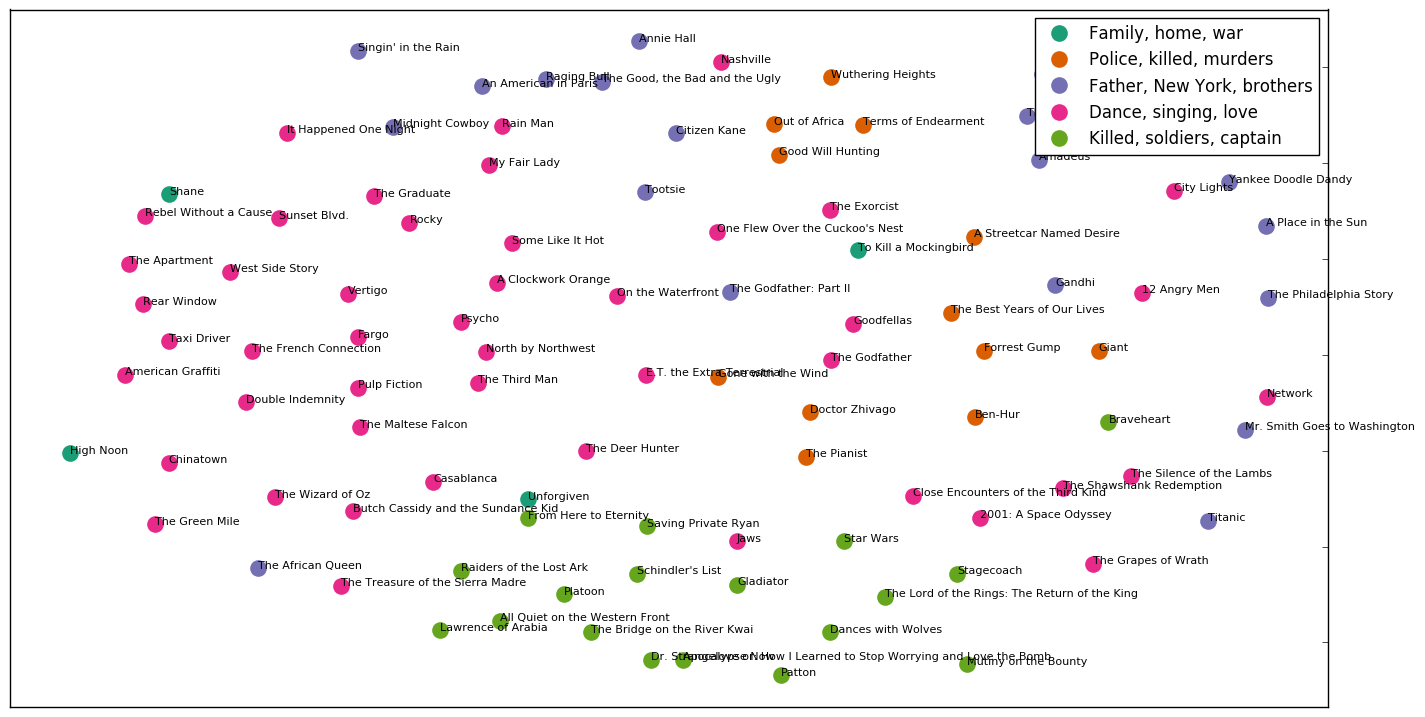

In [103]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [108]:
#Use plotly to generate interactive chart.
#import plotly.plotly as py
#plot_url = py.plot_mpl(fig)
plt.close()